# Capstone Machine Learning: Rain Prediction

I'll go through the life cycle of a machine learning project: 
- Background of topic
- Collect Data
- Clean Data
- Exploratory Data Analysis and Visualization
- Machine Learning Models and Performance Metrics
- Prototype Model Deployments
- Project Conclusions


## **BACKGROUND**

**Floods are the most frequent natural hazard in Canada.** 

Though more common in the spring, floods can happen at any time of the year.

**Flood are caused by:** 
- heavy rainfall + the ground saturated from previous rainfall
- heavy rainfall + the ground is saturated from rapid melting of thick snowpack and/or ice jams
- or more rarely, the failure of a natural or human made dam. 

**Flash Flooding are cause by:** 
- can be caused by hurricanes
- violent storms
- dams breaking.



Due to climate change, the intensity of floods has been increasing. Floods, on a scale that were once considered to be one in a hundred, or one in twenty, are now happening more frequently in many regions, and in areas that were not considered as belonging to flood areas.

The cost to the Quebec government of the 2017 Quebec Floods is estimated at $155,832,000:

- Pontiac: $5,152,000

- Gatineau: $44,618,000

- Rigaud: $11,012,000

- Deux-Montagnes: $11,222,000

- Laval: $13,089,000

- Montreal: $33,287,000

The cost to the Quebec government of the 2019 Quebec Floods is estimated at $127,832,000. The cost of floods could triple by 2030. 


In its report of the 2017 floods, the Montreal Metropolitan Community (82 municipalities, around 4000 km of territory, with 4 million inhabitants) recommended a shared framework across municipalities to measure and monitor risk factors. In 2019, the MMC  released new maps made by a cross-disciplinary team of experts in topography, public policy, engineering, photogrammetry, geomatics, hydrology, urbanism and climate change. The Quebec government also released updated maps in 2019. 

Being able to monitor and predict changing weather patterns, especially the frequency and intensity of heavy rainfall, is vital in flood risk management.

It is in this context that I will try to create a machine learning model from weather station data that can predict rainfall.


**REFERENCES**

- https://www.getprepared.gc.ca/cnt/hzd/flds-en.aspx

- https://ici.radio-canada.ca/info/videos/media-7894935/cout-inondations-2018 (mai 8, 2018)

- https://www.ledroit.com/actualites/crue-printaniere-2019/les-inondations-printanieres-ont-coute-208-m-video-985f789403aba9248081531a3080dff3 (3 juillet 2019)

- https://www.ledevoir.com/societe/environnement/577648/le-cout-des-inondations-pourrait-tripler-d-ici-2030 (24 avril 2020)

- https://cmm.qc.ca/projets/resilience-aux-inondations/

- Portrait des inondations printanières de 2017 sur le territoire métropolitain, du cadre légal et des règles applicables en matière d'aménagement de developpement du territoire  pour les plaines inondables  (CMM, Sept 2017, pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **COLLECT DATA**

### Weather Station datasets from the government of Canada

https://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?searchType=stnName&timeframe=1&txtStationName=Laprairie&searchMethod=contains&optLimit=yearRange&StartYear=1840&EndYear=2021&Year=1983&Month=7&Day=21&selRowPerPage=25


This is the Government of Canada dashboard for historical data on past weather and climate. In the 'Year' menu, the year that appears is the year for which the most recent data is available.

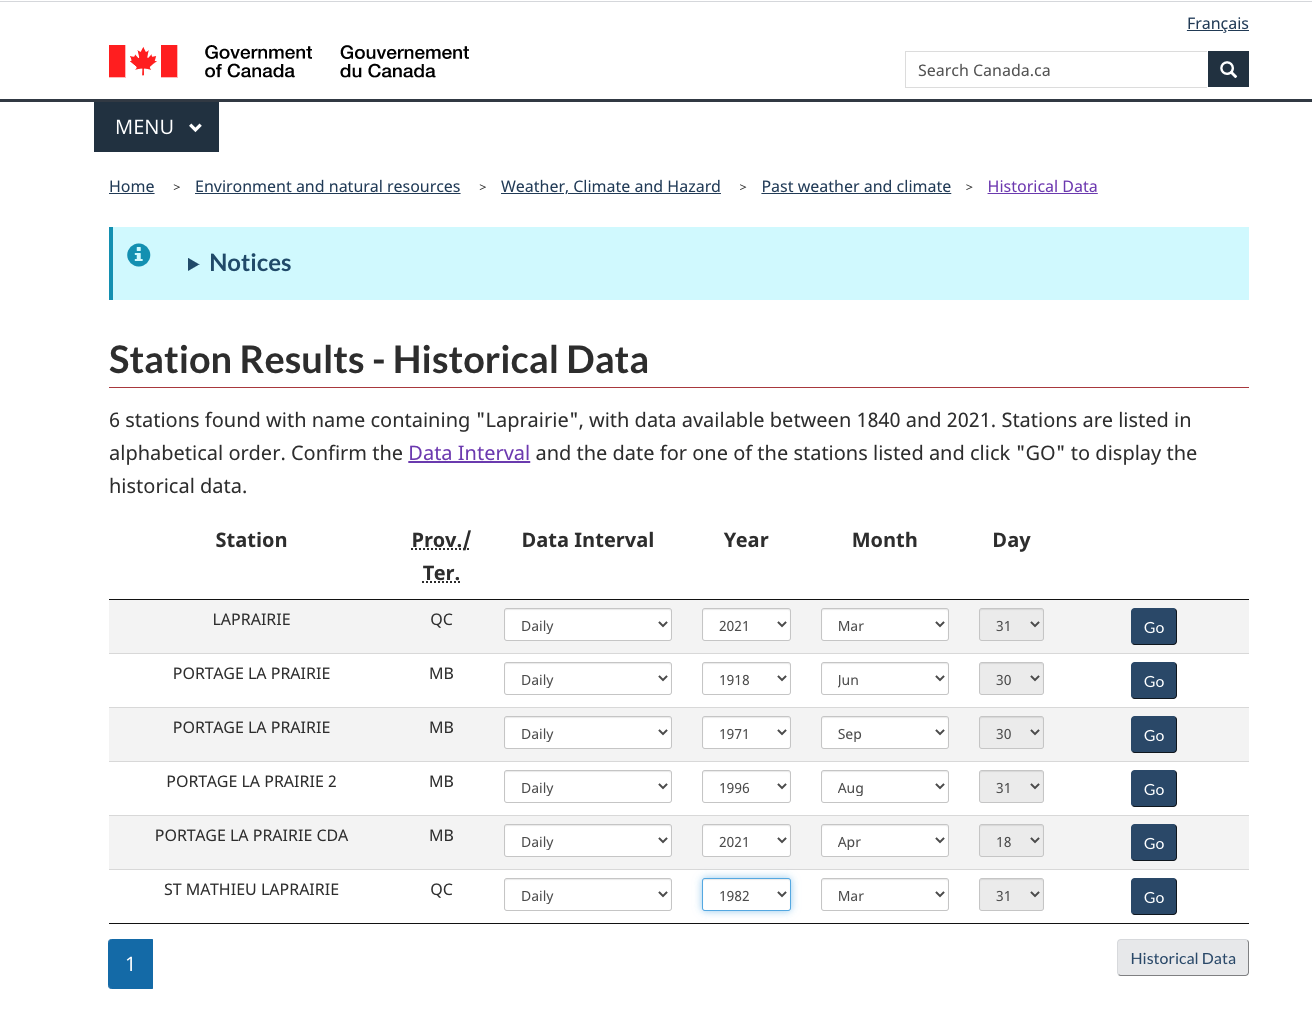

Among the most recent datasets I could find, were some from the Laprairie station. I downloaded data for 2020 and 2019. Below are the columns for 2020.

In [2]:
df_lp_2020 = pd.read_csv('en_climate_daily_QC_7024100_2020_P1D.csv')
df_lp_2020.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

The table is mostly made of null values!

In [3]:
df_lp_2020.isnull().sum()

Longitude (x)                  0
Latitude (y)                   0
Station Name                   0
Climate ID                     0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 366
Max Temp (°C)                 58
Max Temp Flag                307
Min Temp (°C)                 57
Min Temp Flag                307
Mean Temp (°C)               366
Mean Temp Flag               366
Heat Deg Days (°C)           366
Heat Deg Days Flag           366
Cool Deg Days (°C)           366
Cool Deg Days Flag           366
Total Rain (mm)               79
Total Rain Flag              278
Total Snow (cm)               29
Total Snow Flag              332
Total Precip (mm)             97
Total Precip Flag            257
Snow on Grnd (cm)             81
Snow on Grnd Flag            285
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)       366
Spd of Max

Maybe this was due to Covid? Unfortunately, the 2019 and other datasets are also mostly nulls.

In [4]:
df_lp_2019 = pd.read_csv('en_climate_daily_QC_7024100_2019_P1D.csv')
#df_lp_2019

In [5]:
df_lp_2019.isnull().sum()

Longitude (x)                  0
Latitude (y)                   0
Station Name                   0
Climate ID                     0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 365
Max Temp (°C)                 31
Max Temp Flag                365
Min Temp (°C)                 31
Min Temp Flag                364
Mean Temp (°C)               365
Mean Temp Flag               365
Heat Deg Days (°C)           365
Heat Deg Days Flag           365
Cool Deg Days (°C)           365
Cool Deg Days Flag           365
Total Rain (mm)              108
Total Rain Flag              282
Total Snow (cm)               42
Total Snow Flag              346
Total Precip (mm)            113
Total Precip Flag            270
Snow on Grnd (cm)             78
Snow on Grnd Flag            318
Dir of Max Gust (10s deg)    365
Dir of Max Gust Flag         365
Spd of Max Gust (km/h)       365
Spd of Max

**What can be done when an appropriate dataset is not available?**

1/ Create dataset: collect data manually

2/ Find a dataset with some relevant information as a starting point

Given lack of resources and time, I opted for option 2.

### Rain in Australia dataset from Kaggle

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

"This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more."



Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

In [6]:
df = pd.read_csv('weatherAUS.csv')

The weather dataset from Australia contains similar columns in terms of date, identifying the station, max/min temperatures, and wind direction.

But missing columns include: snow fall and snow on ground; flagging cool, hot, windy, rainy and days. 

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

However, since it has columns on humidity and clouds, it is a good dataset to predict rain. 

## **CLEAN DATA**

### Null values

**Dealing with null values in target column**

In [8]:
# several nans, including in future target set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The null values for the target column account for 2.23%.
I remove those rows since I won't be able to test on them. 

In [9]:
# immediately remove these rows, as won't be able to train/test
df.dropna(axis=0, subset=['RainTomorrow'], inplace=True)

**Dealing with null values in string feature columns**

In [10]:
# check out string columns
string_df = df.select_dtypes(include='object')
string_df

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No


In [11]:
# function to view null values in ascending order
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan.sort_values(ascending=False)

In [12]:
# apply percent_missing function to see nulls by string columns
percent_nan_str = percent_missing(string_df)
percent_nan_str

WindDir9am     7.041838
WindGustDir    6.561504
WindDir3pm     2.656952
RainToday      0.988797
dtype: float64

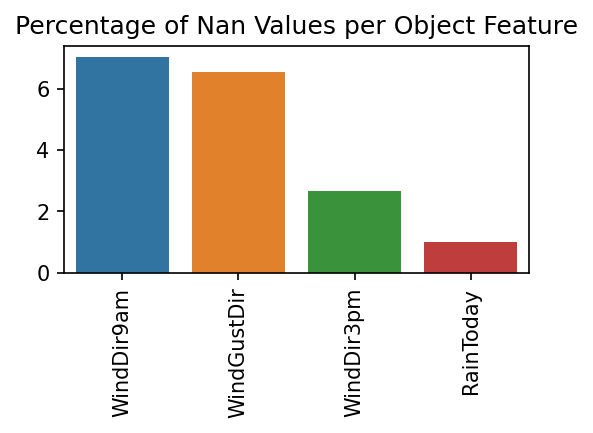

In [13]:
plt.figure(figsize=(4,2), dpi=150)
sns.barplot(x=percent_nan_str.index,y=percent_nan_str)
plt.title("Percentage of Nan Values per Object Feature")
plt.xticks(rotation=90)
plt.show()

I decide to drop the null rows for 'RainToday' because:
- the rows represent less than 1% of rows
- cannot calculate a mean

In [14]:
df.dropna(axis=0, subset=['RainToday'], inplace=True)

I change the null values to "unknown" because:
- the rows for these features represent more than 1% per column
- perhaps there are no values because of equipment failure or weather conditions. It is a good idea to keep these rows in case they mask other issues.

In [15]:
# for multi-category column: fill str nulls with "Unknown"
df['WindDir9am'].fillna('Unknown', inplace=True)
df['WindGustDir'].fillna('Unknown', inplace=True)
df['WindDir3pm'].fillna('Unknown', inplace=True)

In [16]:
string_df = df.select_dtypes(include='object')
string_df.isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

**Dealing with null values in numeric feature columns**

In [17]:
# check out numeric columns
numeric_df = df.select_dtypes(exclude='object')

In [18]:
percent_nan_num = percent_missing(numeric_df)
percent_nan_num

Sunshine         47.451114
Evaporation      42.400222
Cloud3pm         39.843167
Cloud9am         37.379161
Pressure3pm       9.780022
Pressure9am       9.761555
WindGustSpeed     6.467216
Humidity3pm       2.486735
Temp3pm           1.863808
WindSpeed3pm      1.797751
Humidity9am       1.077514
WindSpeed9am      0.749359
Temp9am           0.465952
MinTemp           0.332417
MaxTemp           0.218060
dtype: float64

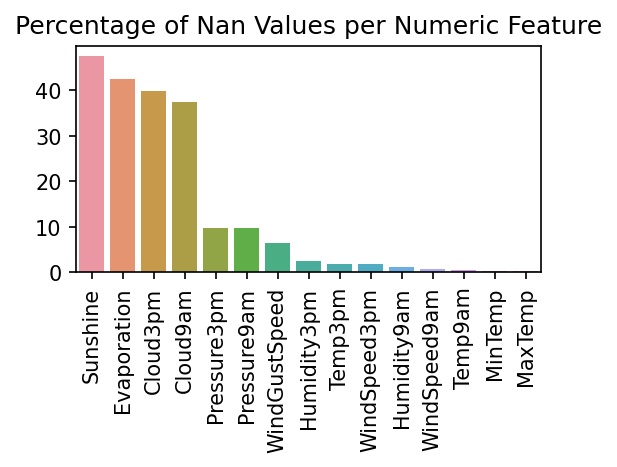

In [19]:
plt.figure(figsize=(4,2), dpi=150)
sns.barplot(x=percent_nan_num.index,y=percent_nan_num)
plt.title("Percentage of Nan Values per Numeric Feature")
plt.xticks(rotation=90);

For the following features, I update null values based on feature means by location.

In [20]:
df['Humidity3pm'] = df.groupby('Location')['Humidity3pm'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['Temp3pm'] = df.groupby('Location')['Temp3pm'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['WindSpeed3pm'] = df.groupby('Location')['WindSpeed3pm'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['Humidity9am'] = df.groupby('Location')['Humidity9am'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['WindSpeed9am'] = df.groupby('Location')['WindSpeed9am'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['Temp9am'] = df.groupby('Location')['Temp9am'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['MinTemp'] = df.groupby('Location')['MinTemp'].transform(lambda val: val.fillna(val.mean())).iloc[::]
df['MaxTemp'] = df.groupby('Location')['MaxTemp'].transform(lambda val: val.fillna(val.mean())).iloc[::]

But for these features, no feature mean grouped by location was possible, so I therefore update the null values based on the column mean.

In [21]:
# for these features, no mean by location is available
# Therefore, I fill nulls with column mean

df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())


**The null values after data cleaning.**

In [22]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## **EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

### **Dealing with class imbalance**

In [23]:
df['RainTomorrow'].value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [24]:
print(f"Class 0 has a percentage of: {round(len(df[df['RainTomorrow'] == 'No']) / len(df) *100, 2)} %")
print(f"Class 1 has a percentage of: {round(len(df[df['RainTomorrow'] == 'Yes']) / len(df) *100, 2)} %")

Class 0 has a percentage of: 77.84 %
Class 1 has a percentage of: 22.16 %


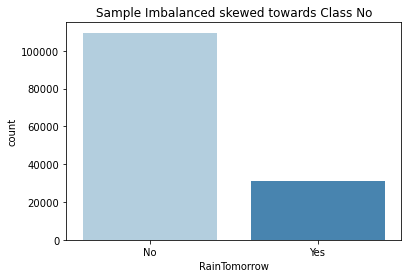

In [25]:
# visualize imbalance in dataset
sns.countplot(data=df,x='RainTomorrow', palette='Blues');
plt.title("Sample Imbalanced skewed towards Class No");

I resample to avoid a possible "accuracy paradox" by up-sampling the minority class 1.

In [26]:
from sklearn.utils import resample

In [27]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})

In [28]:
df['RainToday'] = df['RainToday'].map({'No':0, 'Yes':1})

In [29]:
# divide 'RainTomorrow' into 2 classes: majority = 0, minority = 1
df_majority = df[df['RainTomorrow'] == 0]
df_minority = df[df['RainTomorrow'] == 1]

In [30]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [31]:
df_rain_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [32]:
df_rain_upsampled['RainTomorrow'].value_counts()

0    109586
1    109586
Name: RainTomorrow, dtype: int64

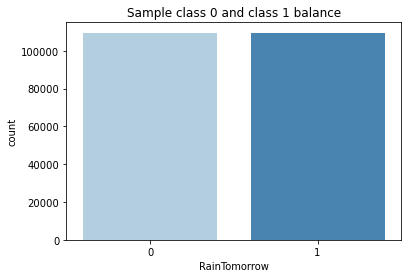

In [33]:
# balanced dataset
sns.countplot(data=df_rain_upsampled, x='RainTomorrow', palette='Blues');
plt.title("Sample class 0 and class 1 balance");

### **Feature correlations to target column**


In [34]:
df_rain_upsampled.corr()['RainTomorrow'][:-1].sort_values()

Sunshine        -0.372366
Pressure9am     -0.275363
Pressure3pm     -0.252262
Temp3pm         -0.230743
MaxTemp         -0.192362
Evaporation     -0.114530
Temp9am         -0.033069
WindSpeed3pm     0.097648
MinTemp          0.101088
WindSpeed9am     0.103691
Rainfall         0.219959
WindGustSpeed    0.250358
Cloud9am         0.313092
Humidity9am      0.316928
RainToday        0.338424
Cloud3pm         0.367886
Humidity3pm      0.509071
Name: RainTomorrow, dtype: float64

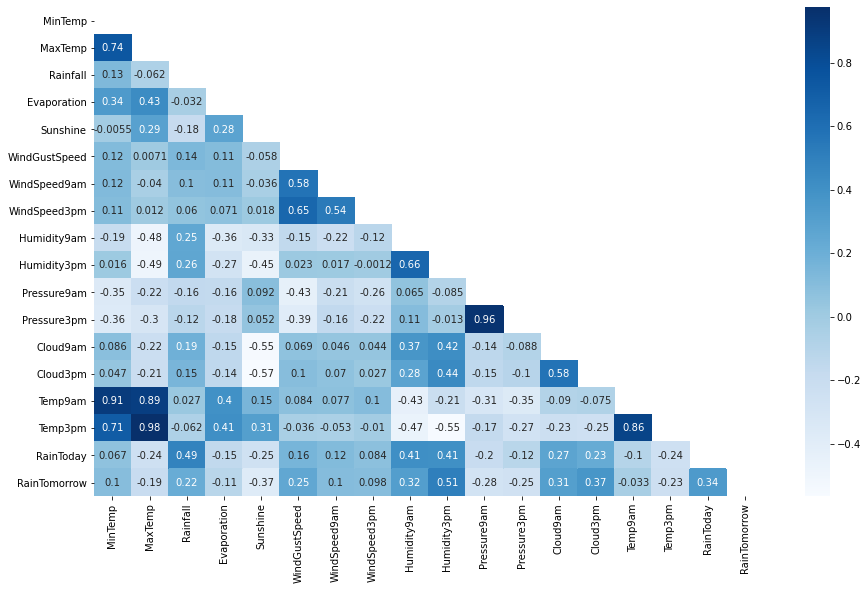

In [35]:
corr = df_rain_upsampled.corr()

# getting the upper triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, mask=matrix, cmap='Blues');

# last row shows the corr specific to 'Rain Toromorrow'

MinTemp and Temp9am highly correlated at 0.91. I visualize both features with boxplots.

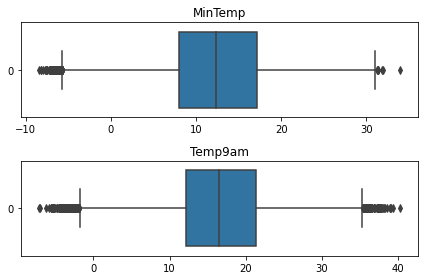

<Figure size 720x720 with 0 Axes>

In [36]:
# MinTemp and Temp9am 

fig, ax = plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(data= df_rain_upsampled['MinTemp'], orient='h', ax=ax[0])
ax[0].set_title('MinTemp')
sns.boxplot(data=df_rain_upsampled['Temp9am'], orient='h', ax=ax[1])
ax[1].set_title('Temp9am')
fig.tight_layout()

# 'MinTemp' correlation to 'RainTomorrow' at 0.1, while 'Temp9am' correlation to 'RainTomorrow' is -0.033
# keep 'MinTemp', and drop 'Temp9am'?

MaxTemp and Temp3pm highly correlated at 0.98. I visualize both features with boxplots.

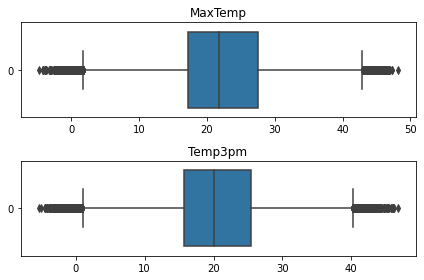

<Figure size 720x720 with 0 Axes>

In [37]:
# MaxTemp and Temp3pm

fig, ax = plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(data= df_rain_upsampled['MaxTemp'], orient='h', ax=ax[0])
ax[0].set_title('MaxTemp')
sns.boxplot(data=df_rain_upsampled['Temp3pm'], orient='h', ax=ax[1])
ax[1].set_title('Temp3pm')
fig.tight_layout()

# 'MaxTemp' correlation to 'RainTomorrow' at -0.19, while 'Temp3pm' correlation to 'RainTomorrow' is -0.23
# keep 'Temp3pm', and drop 'MaxTemp'?

Pressure3pm and Pressure9am are highly correlated at 0.96. I visualize both features with boxplots.

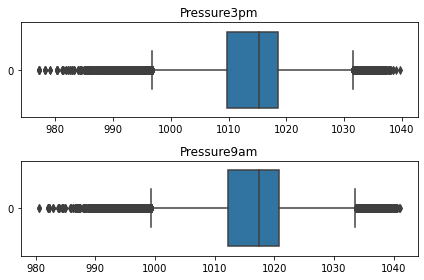

<Figure size 720x720 with 0 Axes>

In [38]:
# Pressure3pm and Pressure9am

fig, ax = plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(data= df_rain_upsampled['Pressure3pm'], orient='h', ax=ax[0])
ax[0].set_title('Pressure3pm')
sns.boxplot(data=df_rain_upsampled['Pressure9am'], orient='h', ax=ax[1])
ax[1].set_title('Pressure9am')
fig.tight_layout()

# 'Pressure3pm' correlation to 'RainTomorrow' at -0.25 , 'Pressure9am' correlation to 'RainTomorrow' is -0.28
# keep 'Pressure9am', and drop 'Pressure3pm'

In [39]:
df_rain_upsampled.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## **MACHINE LEARNING MODELS**

Feature selection and encoding of categorical features will be done in each machine learning section.

The high correlation between certain features raises the question: should one of two highly correlated feature pair be dropped? Depending on the model used, I keep both correlated features, or remove one of the feature correlated pair.

I use dummy variables for categorical columns because hot-encoding may introduce an ordinal element to a feature that would not be appropriate in this case.

### **LOGISTIC REGRESSION**

- I keep all features, even the paired correlated ones
- Train|Validation|Test split
- I scale the X subsets

In [40]:
# SCENARIO 1: I keep all columns
X = pd.get_dummies(df_rain_upsampled.drop('RainTomorrow',axis=1),drop_first=True)
y = df_rain_upsampled['RainTomorrow']

Train | Validation | Test split

In [41]:
# Train | Validation | Test split
from sklearn.model_selection import train_test_split

# 80% of data is training data, other 20% is set aside
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=42)

# the 20% other set % is split in half into evaluation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [42]:
# Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaled_X_train = scaler.fit_transform(X_train) # fit_transform at the same time; 
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_model = LogisticRegression(max_iter=500)

In [45]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=500)

#### **METRICS: Logistic Regression**

In [46]:
# model predictions
y_pred_log = log_model.predict(scaled_X_val)
# do not use scaled_X_test until final model has been chosen!!!!

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

Accuracy score at 82%

In [48]:
accuracy_score(y_val,y_pred_log)

0.8190902039512707

In [49]:
confusion_matrix(y_val,y_pred_log)

array([[8888, 2035],
       [1930, 9064]])

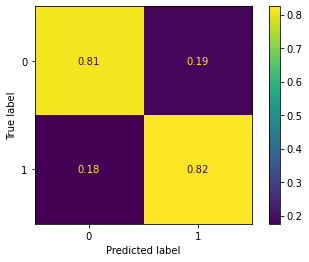

In [50]:
plot_confusion_matrix(log_model,scaled_X_val,y_val, normalize='true')

Classification Report for Logistic Regression

In [51]:
print(classification_report(y_val,y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     10923
           1       0.82      0.82      0.82     10994

    accuracy                           0.82     21917
   macro avg       0.82      0.82      0.82     21917
weighted avg       0.82      0.82      0.82     21917



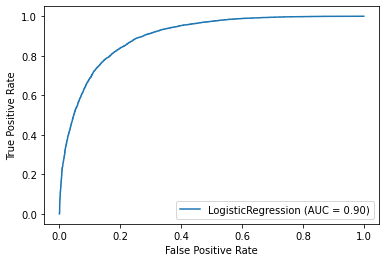

In [52]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,scaled_X_val,y_val)

In [53]:
from sklearn.metrics import plot_precision_recall_curve

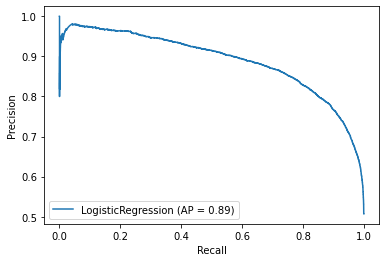

In [54]:
plot_precision_recall_curve(log_model,scaled_X_val,y_val)

### *FINAL METRIC WITH TEST!*

This section was inserted here after all logistic regression with and without regularization were completed. I do the final test here, because for the other models I drop certain features and/or do not use scaled features. It was the best solution to keep the project organized and coherent.

Please note that the metrics for the final test with regards to logistic regression is done here. The elastic net cv and other logistic models only have train and validation.

In [55]:
y_final_test_pred = log_model.predict(scaled_X_test)

Accuracy score of 82 %

In [56]:
accuracy_score(y_test, y_final_test_pred)

0.8194178300939867

In [57]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     10949
           1       0.82      0.83      0.82     10969

    accuracy                           0.82     21918
   macro avg       0.82      0.82      0.82     21918
weighted avg       0.82      0.82      0.82     21918



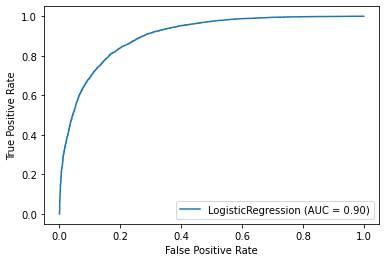

In [58]:
plot_roc_curve(log_model, scaled_X_test, y_test)

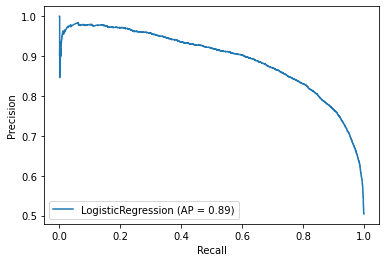

In [59]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

### **ELASTIC NET CV**

- I drop one of the paired correlated features, the feature with the lowest correlation to the target
- Train|Validation|Test split
- I scale the X subsets

In [60]:
# SCENARIO 2: I drop the columns 
df_rain_upsampled.drop(['Date','Temp9am','MaxTemp','Pressure3pm'],axis=1, inplace=True)

In [61]:
# SCENARIO 2: I dropped the columns..... X, y 
X = pd.get_dummies(df_rain_upsampled.drop('RainTomorrow',axis=1),drop_first=True)
y = df_rain_upsampled['RainTomorrow']

Train | Validation | Test split

In [62]:
# Train | Validation | Test split
from sklearn.model_selection import train_test_split

# 80% of data is training data, other 20% is set aside
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=42)

# the 20% other set % is split in half into evaluation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [63]:
# Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create instance of scaler()
scaled_X_train = scaler.fit_transform(X_train) # fit_transform at the same time; 
# fit only to X_train, to avoid linkage to X_val and X_test

# scale everything because the model will be trained on scaled data,
# so it can only validate its performance on scaled data.
# So we're going to both scale validation and test.

# these are all scaled, as that's the only version I'll be using for now.... will NOT need scaled for random forest
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import ElasticNetCV

The 'l1_ratio' chosen are purposely more skewed towards l2 Ridge regularization

- l1_ratio refers to alpha in the equation
- n_alphas is the lambda outside
- Ridge regularization: adds penalty equivalent to the square of magnitude of coefficients

In [65]:
# l1_ratio=[.1, .3, .4,.5, .7, 1] more skewed towards l2 (ridge)
elastic_model = ElasticNetCV(l1_ratio=[.1, .3, .4,.5, .7, 1], n_alphas=100, max_iter=500, tol=0.01)

In [66]:
elastic_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.3, 0.4, 0.5, 0.7, 1], max_iter=500, tol=0.01)

Despite the values being skewed towards Ridge, ElasticNet recommends l1_ratio of 1.0, which means Lasso regularization

In [67]:
# recommends lasso!
elastic_model.l1_ratio_

1.0

This is of course confirmed with l1_ratios recommended in the sklearn documentation that are skewed towards Lasso Regularization

- l1_ratio refers to alpha in the equation
- n_alphas is the lambda outside
- Lasso regularization: adds penalty equivalent to the absolute value of magnitude of coefficients

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.htm

"Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1]"


In [68]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],n_alphas=100, max_iter=500, tol=0.01)

In [69]:
elastic_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=500,
             tol=0.01)

In [70]:
elastic_model.l1_ratio_

1.0

The two elastic net trials recommend Lasso regularization penalty 'l1', which I implement in the next section.

#### METRICS: Logistic Regression and Lasso Regularization

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log_l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=100, random_state=42)

In [73]:
log_l1_model.fit(scaled_X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [74]:
y_pred_logl1 = log_l1_model.predict(scaled_X_val)

The accuracy goes from 82 % with regular Logistic regression to 79 % accuracy with lasso regularization! The ROC and precision-recall curve also go down. This is quite surprisingly!

In [75]:
accuracy_score(y_val,y_pred_logl1)

0.7902541406214354

In [76]:
confusion_matrix(y_val,y_pred_logl1)

array([[8729, 2194],
       [2403, 8591]])

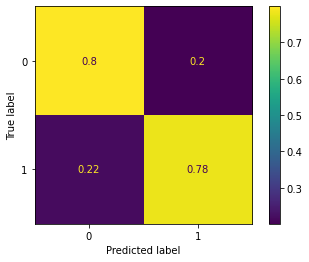

In [77]:
plot_confusion_matrix(log_l1_model,scaled_X_val,y_val, normalize='true')

Classification Report for Logistic Regression with Lasso regularization

In [78]:
print(classification_report(y_val,y_pred_logl1))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     10923
           1       0.80      0.78      0.79     10994

    accuracy                           0.79     21917
   macro avg       0.79      0.79      0.79     21917
weighted avg       0.79      0.79      0.79     21917



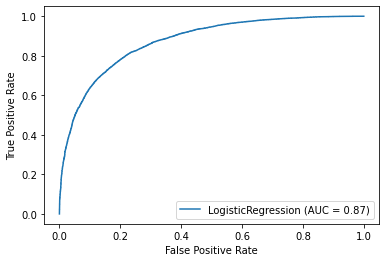

In [79]:
plot_roc_curve(log_l1_model,scaled_X_val,y_val)
#AUC = .87 with regression and dropped columns

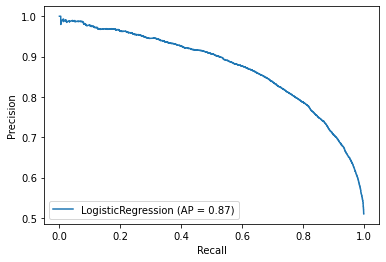

In [80]:
plot_precision_recall_curve(log_l1_model,scaled_X_val,y_val)
#AP = 0.87 with log model and dropped columns

### **LOGISTIC REGRESSION CV**

In [81]:
# LOGISTIC REGRESSION CV WITHOUT COLUMNS
from sklearn.linear_model import LogisticRegressionCV

In [82]:
log_model = LogisticRegressionCV()

In [83]:
from sklearn.model_selection import cross_validate

In [84]:
scores = cross_validate(log_model,scaled_X_train,y_train,
                         scoring=['accuracy', 'recall', 'precision'],
                       cv=5)

In [85]:
scores

{'fit_time': array([7.95184898, 7.96531081, 8.93427014, 8.94017196, 8.62953091]),
 'score_time': array([0.02465105, 0.02519512, 0.02844381, 0.02434826, 0.02442598]),
 'test_accuracy': array([0.78849664, 0.78624387, 0.78529672, 0.78760658, 0.78039182]),
 'test_recall': array([0.7725535 , 0.7743224 , 0.77723252, 0.77636384, 0.76632047]),
 'test_precision': array([0.79781968, 0.7930571 , 0.78980633, 0.79403525, 0.78831817])}

None of the scores are better than just plan Linear Regression!

In [86]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_accuracy,test_recall,test_precision
0,7.951849,0.024651,0.788497,0.772553,0.797820
1,7.965311,0.025195,0.786244,0.774322,0.793057
2,8.934270,0.028444,0.785297,0.777233,0.789806
3,8.940172,0.024348,0.787607,0.776364,0.794035
4,8.629531,0.024426,0.780392,0.766320,0.788318


### **RANDOM FOREST**

- I use the df with one of the correlated feature pairs dropped
- Scaling is not necessary, since the model considers only 1 feature per split
- train | validation | test


In [87]:
df_rain_upsampled.columns
# nake sure I dropped columns

Index(['Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [88]:
# SCENARIO 2
X = pd.get_dummies(df_rain_upsampled.drop('RainTomorrow',axis=1),drop_first=True)
y = df_rain_upsampled['RainTomorrow']

In [89]:
# Train | Validation | Test split
from sklearn.model_selection import train_test_split

# 80% of data is training data, other 20% is set aside
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=42)

# the 20% other set % is split in half into evaluation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
# help(RandomForestClassifier)

- I set the number of decision trees to 10
- the max features to be considered is 'auto', which means the squared number of features
- random seed so the work is replicable

In [92]:
rf_model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=42)

In [93]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [94]:
y_pred_rf = rf_model.predict(X_val)

In [95]:
y_pred_rf

array([0, 1, 0, ..., 1, 1, 1])

METRICS: RANDOM FORESTS

#### METRICS: Random Forest

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

Accuracy score at 95 % !

In [97]:
accuracy_score(y_val,y_pred_rf)

0.946936168271205

In [98]:
confusion_matrix(y_val,y_pred_rf)

array([[10081,   842],
       [  321, 10673]])

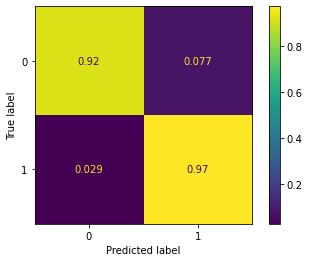

In [99]:
plot_confusion_matrix(rf_model,X_val,y_val, normalize='true')

In [100]:
print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10923
           1       0.93      0.97      0.95     10994

    accuracy                           0.95     21917
   macro avg       0.95      0.95      0.95     21917
weighted avg       0.95      0.95      0.95     21917



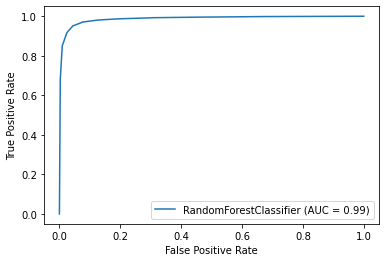

In [101]:
plot_roc_curve(rf_model, X_val, y_val)

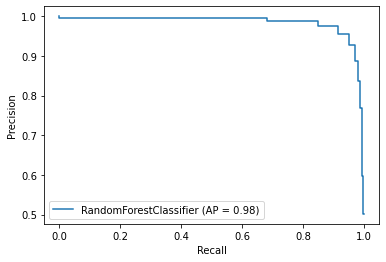

In [102]:
plot_precision_recall_curve(rf_model, X_val, y_val)

In [103]:
y_final_test_pred_rf = rf_model.predict(X_test)

In [104]:
accuracy_score(y_test, y_final_test_pred_rf)

0.946345469477142

In [105]:
print(classification_report(y_test, y_final_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10949
           1       0.93      0.97      0.95     10969

    accuracy                           0.95     21918
   macro avg       0.95      0.95      0.95     21918
weighted avg       0.95      0.95      0.95     21918



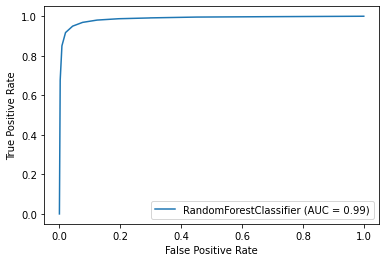

In [106]:
plot_roc_curve(rf_model, X_test, y_test)

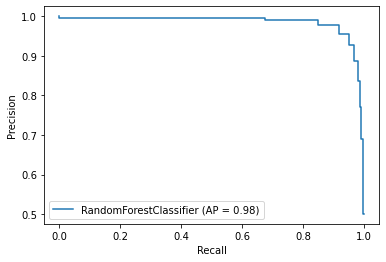

In [107]:
plot_precision_recall_curve(rf_model,X_test,y_test)

## **PROTOTYPE DEPLOYMENTS**

The melting ice caps are changing what are considered normal humidity and cloud coverage levels. It is vital that government weather stations actually record and make available current data to be able to chart the rate of change in known weather patterns.

Any deployment of these proposed prototypes for use in the context of predicting flooding due to rain in Quebec would have to incorporate additional features such as snow precipitation, snow on the ground, snowmelt, and ice mesurements. 

Furthermore, it is important to note that predicting floods also includes factors outside of heavy rain. For example, the steepness of slopes, the type of ground (impermeable rock that doesn't allow water through), compacted or dry soil, whether the soil is already saturated, water levels, etc.

I deploy two model:

The random forest model 'final_model_rf' by far performed the best. It had an accuracy of 95 %, a roc curve with a 99 % area under the curve, precision/recall curve with an AP at 98 %. However, this could be due to overfitting. Furthermore, because the model is dependent on specific features, I considered it wise to deploy the logistic regression model as well since the use in the context of Quebec would incorporate additional features that take into account a colder climate.

The chosen logistic regression model 'final_model_log' had an accuracy of 82 %, a roc curve with a 90 % area under the curve, precision/recall curve with an AP at 89 %. 

### **FINAL LOGISTIC REGRESSION**

In [109]:
df_rain_final_LogReg = pd.concat([df_majority, df_minority_upsampled])

In [110]:
df_rain_final_LogReg.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [111]:
X = pd.get_dummies(df_rain_final_LogReg.drop('RainTomorrow',axis=1),drop_first=True)
y = df_rain_final_LogReg['RainTomorrow']

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X = scaler.fit_transform(X)

In [113]:
final_model_log = LogisticRegression(max_iter=500)

In [114]:
final_model_log.fit(X,y)

LogisticRegression(max_iter=500)

In [115]:
# "dump" means save; "load" means load and reuse model elsewhere
from joblib import dump, load

In [116]:
dump(final_model_log, 'prototype_rain_log_reg_model.joblib') 

['prototype_rain_log_reg_model.joblib']

At the client end, a user can load the prototype of the rain logistic regression model with the following code:

from joblib import load

loaded_model = load('prototype_rain_log_reg_model.joblib')

### **FINAL RANDOM FOREST**

In [117]:
X = pd.get_dummies(df_rain_upsampled.drop('RainTomorrow',axis=1),drop_first=True)
y = df_rain_upsampled['RainTomorrow']

In [118]:
final_model_rf = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=42)

In [119]:
final_model_rf.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=42)

In [120]:
# "dump" means save; "load" means load and reuse model elsewhere
from joblib import dump, load

In [121]:
dump(final_model_rf, 'prototype_rain_rf_model.joblib') 

['prototype_rain_rf_model.joblib']

At the client end, a user can load the prototype of the rain logistic regression model with the following code:

from joblib import load

loaded_model = load('prototype_rain_rf_model.joblib')

## **PROJECT CONCLUSIONS**

The number one lesson I learned with Project 3 was: good datasets don't exist in the wild! 

I was extremely disappointed by the unavailability of decent datasets from governmental sites. The dozen of datasets I looked at were completely unusable due to null values. Is this due to faulty measuring equipment, ineffective storing/archiving, or a lack of political will to duly record and make available basic weather metrics?

A huge limitation of my model is that the dataset from Australia consisted of features that do not adequately reflect the conditions in Quebec (snow fall, snow melt, snow on the ground, ice covering, etc). It is also ten years old. But it does provide a baseline to build on. 

Another lesson was that it is best to start with a simple model, then slowly add regularization or change hyperparameters. The Elastic Net CV recommended Lasso regularization, but it was the default Logistic Regression model, which has a default Ridge penalty, that performed the best in the Logistic Regression section. And after much experimentation, it was an uncomplicated version of Random Forest that resulted in an accuracy of 95 % for the test data.

Finally, a better understanding of meteorology would have helped me know what features are correlated with rain and would have probably influenced feature selection. I would definitely have to learn more about meteorology to do machine learning in this field.

This project was a very intensive and positive learning experience for me!